# Project Seminar Data Science and Ai SS2022
### Code for Resnet Models

Disclaimer: Most of the options and training procedures I chose and which I commented are base on observations I made in the project, they might not be generalisable.

Content
- Environment installation
- problem 1 - data
- problem 1 - model
- problem 1 - validation
- problem 2 - data
- problem 2 - model
- problem 2 - validation


I mainly used the fastai library for the project.
https://docs.fast.ai/

### Important notes

- the image names have to be exacly as specified in this notebook otherwise the images cannot be labeled any more, otherwise the functions label_functions and get_mask have to be adapted
- the models in this notebook are called learn for problem 1 and learn2 for problem 2
- the notebook was created and run on Google Colab so some adaptions are necessary when running it somewhere else
- the notebook was run once completely to show that it runs without errors, however training procedures might look wired (mostly overtrained), as they have to be finetuned at evey run, saved models especially for problem 2 are not created exacly from this notebook

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive/')

Mounted at /content/drive/


## Problem 2 - Semantische Segmentierung

For Problem 2 we do the same steps as for problem 1: load data, create dataloader, define model, train model, test model.

### Load Data
Here we have to load two folders, the pictures and their respective masks.

In [ ]:
# replace path dependening on you file locations
path_to_pictures = "/content/drive/MyDrive/Adrian/Semantic Segmentation-Laura Ulrich/Voronoi/Maskenbausteine kombiniert/Voronoibilderpng224/"

path_to_masks = "/content/drive/MyDrive/Adrian/Semantic Segmentation-Laura Ulrich/Voronoi/Maskenbausteine kombiniert/Voronoimaskenpng224/"
print(os.listdir(path_to_pictures))
#Achtung! Sicherstellen, dass die Masken auch wirklich BINÄR sind
!pip install fastai wwf -q --upgrade
from fastai.vision.all import *
import torch
import fastai
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
from tqdm import tqdm

['Result901.png', 'Result902.png', 'Result903.png', 'Result904.png', 'Result905.png', 'Result906.png', 'Result907.png', 'Result908.png', 'Result909.png', 'Result911.png', 'Result910.png', 'Result912.png', 'Result913.png', 'Result914.png', 'Result915.png', 'Result917.png', 'Result916.png', 'Result919.png', 'Result918.png', 'Result920.png', 'Result922.png', 'Result921.png', 'Result923.png', 'Result924.png', 'Result925.png', 'Result926.png', 'Result927.png', 'Result928.png', 'Result929.png', 'Result930.png', 'Result931.png', 'Result932.png', 'Result933.png', 'Result934.png', 'Result936.png', 'Result935.png', 'Result937.png', 'Result938.png', 'Result939.png', 'Result940.png', 'Result942.png', 'Result941.png', 'Result943.png', 'Result945.png', 'Result944.png', 'Result946.png', 'Result947.png', 'Result948.png', 'Result949.png', 'Result950.png', 'Result951.png', 'Result952.png', 'Result953.png', 'Result954.png', 'Result955.png', 'Result956.png', 'Result957.png', 'Result958.png', 'Result959.pn

In [ ]:
fnames = get_image_files(path_to_pictures)

In [ ]:
lbl_names = get_image_files(path_to_masks)

In [ ]:
# quick check
print("Number of masks: " + str(len(lbl_names)))
print("Number of images: " + str(len(fnames)))

Number of masks: 1900
Number of images: 1900


In [ ]:
# quick check for file names, these have to be consitens
# exacly like that
# '.../MyResult_bw1301.png'
# '...MyResult1301.jpg'

print(lbl_names[9])
print(fnames[0])

/content/drive/MyDrive/Adrian/Semantic Segmentation-Laura Ulrich/Voronoi/Maskenbausteine kombiniert/Voronoimaskenpng224/Result_bw924.png
/content/drive/MyDrive/Adrian/Semantic Segmentation-Laura Ulrich/Voronoi/Maskenbausteine kombiniert/Voronoibilderpng224/Result901.png


Load a mask to check how many different pixel colours it has,
only allowed to have to (black 255 and white 0)

In [ ]:
# create a dictionary needed to get the masks later
# 0 = brittle, 1 = ductile
p2c = {0: 0, 1: 255}

In [ ]:
p2c

{0: 0, 1: 255}

Some tests, to check if masks can be found

In [ ]:
# this path should show to the folder from the project
# this folder will have to have two subfolders one for masks and one for images
path = "/content/drive/MyDrive/Adrian/Semantic Segmentation-Laura Ulrich/Voronoi/Maskenbausteine kombiniert/"

In [ ]:
regex = re.compile(r'\d+')

def get_msk_hlp(image):
  imgname = image.name
  num = str(regex.findall(imgname)[0])
  # this has to be edited, masks2 = name of folder containing masks
  labelname = path+'Voronoimaskenpng224/Result_bw'+num+'.png'
  return labelname

First part of the function that can find the mask to an image, again just use filename to find repecitve on

In [ ]:
# create a dictionary needed to get the masks later
# 0 = brittle, 1 = ductile
p2c = {0: 0, 1: 255}

In [ ]:
p2c

{0: 0, 1: 255}

In [ ]:
# this path should show to the folder from the project
# this folder will have to have two subfolders one for masks and one for images
path = "/content/drive/MyDrive/Adrian/Semantic Segmentation-Laura Ulrich/Voronoi/Maskenbausteine kombiniert/"

First part of the function that can find the mask to an image, again just use filename to find repecitve on

In [ ]:
regex = re.compile(r'\d+')

def get_msk_hlp(image):
  imgname = image.name
  num = str(regex.findall(imgname)[0])
  # this has to be edited, masks2 = name of folder containing masks
  labelname = path+'Voronoimaskenpng224/Result_bw'+num+'.png'
  return labelname

Some tests, to check if masks can be found

In [ ]:
get_msk_hlp(fnames[0])

'/content/drive/MyDrive/Adrian/Semantic Segmentation-Laura Ulrich/Voronoi/Maskenbausteine kombiniert/Voronoimaskenpng224/Result_bw901.png'

In [ ]:
fnames[0]

Path('/content/drive/MyDrive/Adrian/Semantic Segmentation-Laura Ulrich/Voronoi/Maskenbausteine kombiniert/Voronoibilderpng224/Result901.png')

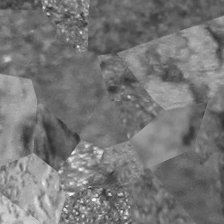

In [ ]:
Image.open(fnames[0])

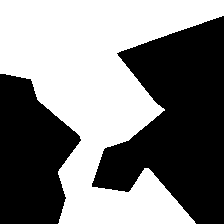

In [ ]:
Image.open(get_msk_hlp(fnames[0]))

In [ ]:
# weiß = spröde
# schwarz = duktil

In [ ]:
def get_msk(fn, p2c):
  fn = get_msk_hlp(fn)
  msk = np.array(PILMask.create(fn))
  for i, val in enumerate(p2c):
    msk[msk==p2c[i]] = val
  return PILMask.create(msk)

## Create Dataloader, from DataBlock

In [ ]:
codes = ['sproede', 'duktil']

In [ ]:
get_y = lambda o: get_msk(o, p2c)

In [ ]:
binary = DataBlock(blocks=(ImageBlock, MaskBlock(codes)),
                   get_items=get_image_files,
                   splitter=RandomSplitter(),
                   get_y=get_y,
                   batch_tfms=[Normalize.from_stats(*imagenet_stats)])

In [ ]:
dls2 = binary.dataloaders(path+'Voronoibilderpng224', bs=2) #bs=8
print(os.listdir(path+'Voronoibilderpng224'))

['Result901.png', 'Result902.png', 'Result903.png', 'Result904.png', 'Result905.png', 'Result906.png', 'Result907.png', 'Result908.png', 'Result909.png', 'Result911.png', 'Result910.png', 'Result912.png', 'Result913.png', 'Result914.png', 'Result915.png', 'Result917.png', 'Result916.png', 'Result919.png', 'Result918.png', 'Result920.png', 'Result922.png', 'Result921.png', 'Result923.png', 'Result924.png', 'Result925.png', 'Result926.png', 'Result927.png', 'Result928.png', 'Result929.png', 'Result930.png', 'Result931.png', 'Result932.png', 'Result933.png', 'Result934.png', 'Result936.png', 'Result935.png', 'Result937.png', 'Result938.png', 'Result939.png', 'Result940.png', 'Result942.png', 'Result941.png', 'Result943.png', 'Result945.png', 'Result944.png', 'Result946.png', 'Result947.png', 'Result948.png', 'Result949.png', 'Result950.png', 'Result951.png', 'Result952.png', 'Result953.png', 'Result954.png', 'Result955.png', 'Result956.png', 'Result957.png', 'Result958.png', 'Result959.pn

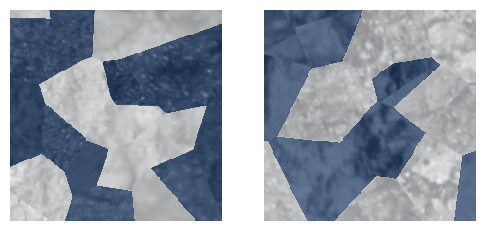

In [ ]:
dls2.show_batch(cmap='Blues', vmin=0, vmax=1)

### Create Model

In [ ]:
learn2 = unet_learner(dls2, resnet101)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:03<00:00, 48.4MB/s]


In [ ]:
learn2.freeze_to(0)

In [ ]:
learn2.summary()

DynamicUnet (Input shape: 2 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     2 x 64 x 112 x 112  
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     2 x 64 x 56 x 56    
MaxPool2d                                                      
Conv2d                                    4096       True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
____________________________________________________________________________
                     2 x 256 x 56 x 56   
Conv2d                                    16384      True      
BatchNorm2d                        

### Train Model

SuggestedLRs(valley=1.737800812406931e-05)

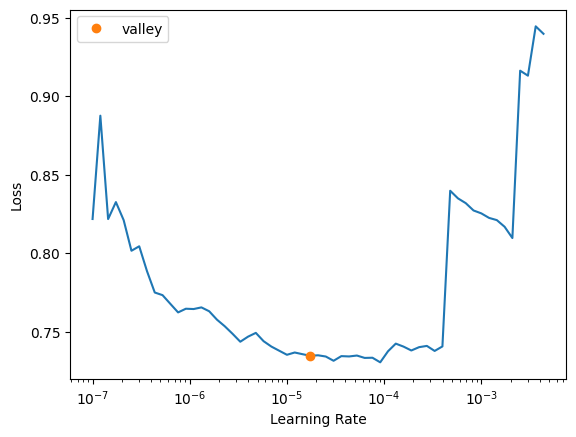

In [ ]:
# learning rate varies in every run as training set is created randomly by dataloader
# training chooses in the next steps a slidly different lr
learn2.lr_find()

In [ ]:
learn2.fit_one_cycle(10, 1.737800812406931e-05, cbs=[ShowGraphCallback()])

epoch,train_loss,valid_loss,time


In [ ]:
learn2.freeze_to(1)

In [ ]:
learn2.summary()

In [ ]:
learn2.fit_one_cycle(1, 3.0199516913853586e-06, cbs=[ShowGraphCallback()])

In [ ]:
learn2.fine_tune(4, 3.0199516913853586e-07, cbs=[ShowGraphCallback()])
# over trained, but varies in every run, to find optimal model adjust parameters every time notebook is run

### Save Model

In [ ]:
learn2.save('/content/drive/MyDrive/Adrian/MLSeminar/ResNet/ResNet6')

### Load Model

In [ ]:
# same as in problem 1 dataloader and model required, where we load the model parameters into
learn2.load('/content/drive/MyDrive/Adrian/MLSeminar/ResNet/ResNet6') # not exacly the model trained above, rather the model used on poster etc. but almoast identical training

### Validation

Show some results

In [ ]:
learn2.show_results(cmap='Blues', vmin=0, vmax=1)

Use interpretation class again

In [ ]:
interp = SegmentationInterpretation.from_learner(learn2)


In [ ]:
interp.plot_top_losses(k=10)

### Get predictions for 20 evaluation mixed fractures

First create a new method, to get predicitons for every image in the folder


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import skimage
from skimage.draw import ellipse
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate
from skimage import filters, morphology, measure
import plotly.express as px
import plotly
import torch
import cv2 as cv


min_size = 9025 # hier die Flughöheneinstellung, bisher Überschlagsrechnung
Kernelsize=45 # Kernel als integer, kein Tupel
o=0

def get_duk_percent(imagepath, model):
  '''Method that gets a predictions for an image and then counts ductile pixels
     to get ductile percentage of the image

     Parameters:
     imagepath (str): path to the image
     model: name of the model has to be loaded before

     Returns: ductile percentage
  '''
  size = len(np.array(model.predict(imagepath)[0][1]))
  index = 0
  size1 = len(np.array(model.predict(imagepath)[0]))
  prediction = model.predict(imagepath)
  sum = 0
  counter = 0

  print(size)
  print(size1)

  duk = prediction[0].sum()
  print("ductil: " + str(round(float(duk),ndigits=2)))

  print("Percentage ductil = " + str(round(float(1-round(float(duk)/(size*size1),ndigits=2)),ndigits=2)))

  # heatmap
  imagep = str(imagepath)
  dl = model.dls.test_dl(imagep)
  preds = model.get_preds(dl=dl)
  pred_1 = preds[0][0]


  pred_im = model.predict(imagepath)[0]
  pred_im
  mask_fn = imagepath
  mask = PILImage.create(mask_fn)

  print(imagepath)

  Image1 = mask
  Image2 = pred_im
  print(pred_im)
  Image3 = pred_1[1]
  pred_im = pred_im.numpy()
  print(pred_im.shape)
  Image4 = Flughohenfilter(pred_im,min_size=min_size) #neu hier min size in pixel angeben
  Image4NP = Image4.astype(np.float64) #/ info.max # normalize the data to 0 - 1
  print("Image4NP")
  Image4NP = 255 * Image4NP # Now scale by 255
  Image4NP = Image4NP.astype(np.uint8)

  Image5=Medianfilter(Image4NP,45,Iterationen=4)
  Image5=np.array(Image5, dtype=int)*255
  fig = plt.figure(figsize=(8, 8))
  Image5NP = Image5.astype(np.float64) #/ info.max # normalize the data to 0 - 1
  Image5NP = 255 * Image5NP # Now scale by 255
  Image5NP = Image5NP.astype(np.uint8)

  Image6=Contour(imagepath, Image5NP)

  Image6.save('ax2_figure.png')


  rows = 1
  columns = 6 #neu


  # Adds a subplot at the 1st position
  fig.add_subplot(rows, columns, 1)

  # showing image
  plt.imshow(Image1)
  plt.axis('off')
  plt.title(str(imagep[len(imagep)-18:]))

  # Adds a subplot at the 2nd position
  fig.add_subplot(rows, columns, 2)

  # showing image
  plt.imshow(Image2)
  plt.axis('off')
  plt.title("ductil: " + str(round(float(1-round(float(duk)/(size*size1),ndigits=2)),ndigits=2)))

  # Adds a subplot at the 3rd position
  fig.add_subplot(rows, columns, 3)

  # showing image
  plt.imshow(Image3)
  plt.axis('off')
  plt.title("certainty")

  # Adds a subplot at the 4th position neu
  fig.add_subplot(rows, columns, 4)

  plt.imshow(Image4)
  plt.axis('off')
  plt.title(label=os.path.join("filtered"+str(min_size)+"px^2"))

  # Adds a subplot at the 5th position neu
  fig.add_subplot(rows, columns, 5)
  plt.imshow(Image5)
  plt.axis('off')
  plt.title(label=os.path.join("Med"))
  plt.imshow(Image5, cmap='gray', vmin=0, vmax=255)

  # Adds a subplot at the 5th position neu
  fig.add_subplot(rows, columns, 6)
  plt.imshow(Image6)
  plt.axis('off')
  plt.title(label=os.path.join("Overlay"))
  plt.imshow(Image6, cmap='gray', vmin=0, vmax=255)


  #uncomment this part if the predictions should be save directly somewhere + set path to destination verschoben zu pred_folder
  #os.chdir('/content/drive/MyDrive/Adrian/MLSeminar/ResNet/Umfrage')
  #plt.savefig(str(i+1), dpi=150)


  return (1-float(sum)/(size*size1))

def Contour(Original, img):
  #Maske binarisiert laden
  #im_gray = np.array(Image.open(img).convert('L'))
  im_gray = np.array(Image.open(Original).convert('L'))
  contours, hierarchy = cv.findContours(img, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
  #normales Eingabebild zuerst, als zweites Contour der Maske
  Contour=cv.drawContours(im_gray, contours, -1, (0,255,0), 3)
  Contour=Image.fromarray(Contour)
  print("Contour")
  display(Contour)
  return Contour



def Flughohenfilter(mask, min_size):
    'Filter to eliminate areas below threshold size given as min_size'
    mask=255*mask
    filtered = mask>254
    'Picture threshold so that remove command will function properly'
    #display(filtered)
    filteredmask = morphology.remove_small_objects(filtered, min_size=min_size, connectivity=1, in_place=True)
    filteredmask2 = morphology.remove_small_holes(filteredmask, area_threshold=min_size, connectivity=1, in_place=True)
    #plt.imshow(mask)
    #plt.show()
    'retransform the image'
    filteredmask2=np.array(filteredmask2, dtype=int)*255
    #display(filteredmask2)
    return (filteredmask2)

def Medianfilter (arr, Kernelsize, Iterationen):
  #rows=1
  #columns=Iterationen
  for i in range (1,Iterationen):
      median=cv.medianBlur(arr,Kernelsize)
      median=np.array(median, dtype=int)*255
      #fig = plt.figure(figsize=(8, 8))
      medianNP = median.astype(np.float64) #/ info.max # normalize the data to 0 - 1
      medianNP = 255 * medianNP # Now scale by 255
      medianNP = medianNP.astype(np.uint8) # ist deswegen das Bild in der Ausgabe vlt. schwarz weiß?
      arr=medianNP


      #fig.add_subplot(rows, columns, 4)
      #plt.imshow(median)
      #plt.axis('off')
      #plt.title(label=os.path.join("Medx",str(i)))
      #plt.imshow(median, cmap='gray', vmin=0, vmax=255)


  return medianNP

def pred_folder(folderpath, model):
  '''Methode that get ductile percentages for every image in a folder
  '''
  fnames = get_image_files(folderpath)
  num = len(fnames)
  i = 0
  fsum = 0

  while (i < num):
    fsum = fsum + get_duk_percent(fnames[i], model)
    print("=============================")
    i += 1
    os.chdir('/content/drive/MyDrive/Adrian/MLSeminar/ResNet/Umfrage 2 trainiert mit 2000 Bildern')
    #MedBilder werden noch nicht gespeichert
    plt.savefig(str(i+1), dpi=150)
    Overlay=Image.open('ax2_figure.png')
    Overlay.save(os.path.join('Overlay'+str(i+1)),format="png")
  return

In [ ]:
# the predictions for the model
pred_folder("/content/drive/My Drive/Adrian/MLSeminar/TP1:Trainingdata/1.3.3 Umfrage Makrobilder",learn2)
os.listdir("/content/drive/My Drive/Adrian/MLSeminar/TP1:Trainingdata/1.3.3 Umfrage 2 Makrobilder/")

### Get IOU for a test set (experimental)

Results of IOU do not make any sense classes are changes randomly, on single images I could validate the IOU getting a prediction of an IOU of around 70% for the model, but the following method does not work properly. Predictions in the methods above make sense, just this one is strange.



In [ ]:
# get iou for a folder

regex = re.compile(r'\d+$')

def get_msk_hlp2(image):
  imgname = image[:len(image)-4]
  num = str(regex.findall(imgname)[0])
  labelname = '/content/gdrive/MyDrive/Bruchbilder/data/validation/masks/Result_bw'+num+'.png'
  return labelname

def get_iou1(path_image, model):
  prediction = model.predict(path_image)[0]
  mask = get_msk_hlp2(path_image)
  mask_array = np.array(PILImage.create(mask))
  pred_array = prediction
  size = len(pred_array)
  indexrow = 0
  indexcol = 0
  counter_cons = 0
  counter_size = 0
  counter = 0

  #start comparing each image
  while indexrow < size:
    while indexcol < size:
      if (mask_array[indexrow][indexcol][0] == 255) and (pred_array[indexrow][indexcol] == 1):
        counter_cons += 1
      if (mask_array[indexrow][indexcol][0] == 255) or (pred_array[indexrow][indexcol] == 1):
        counter_size += 1
      indexcol += 1
      counter += 1
    indexcol = 0
    indexrow +=1

  indexrow = 0
  indexcol = 0

  print("=====================")
  print("consens:" + str(counter_cons))
  print("size: " + str(counter_size))
  print("control: " + str(counter))
  print("IOU: " + str(counter_cons/counter_size))
  print(mask)

  Image1 = PILImage.create(mask)
  Image2 = prediction
  Image3 = PILImage.create(path_image)

  fig = plt.figure(figsize=(8, 8))
  rows = 1
  columns = 3


  # Adds a subplot at the 1st position
  fig.add_subplot(rows, columns, 1)

  # showing image
  plt.imshow(Image1)
  plt.axis('off')
  #plt.title(str(imagep[len(imagep)-18:]))

  # Adds a subplot at the 2nd position
  fig.add_subplot(rows, columns, 2)

  # showing image
  plt.imshow(Image2)
  plt.axis('off')
  #plt.title("ductil: " + str(1-round(float(duk)/(size*size1),3)))

  # Adds a subplot at the 2nd position
  fig.add_subplot(rows, columns, 3)
  plt.imshow(Image3)
  plt.axis('off')

  return counter_cons/counter_size


def iou_folder(pic_folder,model):
  files = get_image_files(pic_folder)
  size = len(files)
  index = 0
  iou_sum = 0

  while (index) < size:
    img_name = pic_folder + '/' + files[index].name
    iou_sum += get_iou1(img_name,model)
    index += 1

  print("---------------------")
  print("IOU mean: " + str(iou_sum/size))

  return iou_sum/size

In [ ]:
#iou_folder("/content/gdrive/MyDrive/Bruchbilder/data/validation/pictures",learn2)
# something is going wrong here in some predictions purple is ductile in some brittle
# just here the case, the other predictions are correct